In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model("stroke_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 744, 32)           8032      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 372, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            102464    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 64)             204864    
                                                                 
 global_average_pooling1d (G  (None, 64)               0

In [6]:
model = keras.models.load_model("qc_model.h5")
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 599, 16)           1616      
                                                                 
 batch_normalization_23 (Bat  (None, 599, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 299, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_49 (Conv1D)          (None, 56, 32)            10272     
                                                                 
 batch_normalization_24 (Bat  (None, 56, 32)           128       
 chNormalization)                                                
                                                     

In [3]:
X_test_data = np.array([np.load("E:\Masters\Projects\DLA\Stroke Dataset\839_s0402_0.npy")])
X_test_label = np.array([1])
print(X_test_data.shape)
print(X_test_label.shape)

(1, 6000, 5)
(1,)


In [4]:
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    last_conv_layer_output, preds = grad_model(data)
    
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
        
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    pooled_grads = tf.reduce_mean(grads, axis=(0))
    
    last_conv_layer_output = last_conv_layer_output[0]
    
    heatmap = last_conv_layer_output * pooled_grads
    print(heatmap)
#     heatmap = tf.reduce_mean(heatmap, axis=(1))
#     heatmap = np.expand_dims(heatmap,0)
    return heatmap

0.99499893
tf.Tensor(
[[-0.00000000e+00 -0.00000000e+00 -7.55294968e-05  3.12254473e-04
   0.00000000e+00 -2.15628635e-04 -1.29618944e-04  5.02503943e-04
   2.07649820e-04  4.95763961e-04 -4.03031045e-05  6.44284184e-04
  -0.00000000e+00  4.91471961e-04  5.28622710e-04 -2.77955929e-04
   5.02393814e-04  3.93044058e-04  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -1.53896544e-04 -2.60438188e-04  0.00000000e+00
  -0.00000000e+00  4.89779399e-04  6.13234763e-04  0.00000000e+00
   5.46087278e-04 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
   0.00000000e+00 -0.00000000e+00  6.35607692e-04  7.78477814e-04
   0.00000000e+00  0.00000000e+00 -1.52431121e-05  4.44243284e-04
  -0.00000000e+00  1.21067511e-04 -0.00000000e+00 -0.00000000e+00
   4.70243162e-04 -2.12213548e-04  4.59572708e-04 -1.17817697e-04
  -9.26832145e-05  2.26945078e-04 -0.00000000e+00 -1.12431357e-04
   4.95735556e-04 -2.53938575e-04 -0.00000000e+00 -0.00000000e+00
  -1.55888760e-04 -0.00000000e+00  3.76477372e-04  2.7

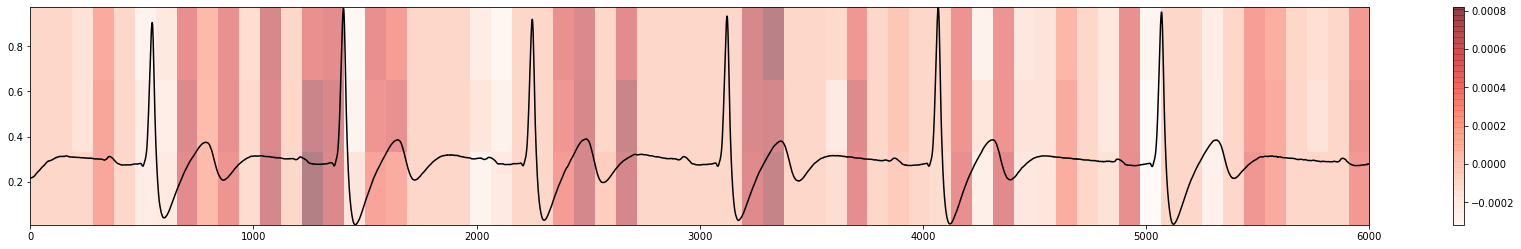

In [6]:
# Class activation map from the input layer to the last Conv. layer
layer_name = "conv1d_2"  #"conv1d_51"

for i in X_test_data:
    data = np.expand_dims(i,0)
    pred = model.predict(data)[0][0]
    print(pred)
    if  pred > 0.5:
        heatmap = grad_cam(layer_name,data)
        plt.figure(figsize=(30,4))
        plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto",extent=[0,6000,i[:, 0].min(),i[:, 0].max()], alpha=0.5)
        plt.plot(i[:, 0],'k')
        plt.colorbar()
        plt.show()

In [58]:
heatmap.shape

TensorShape([3, 128])

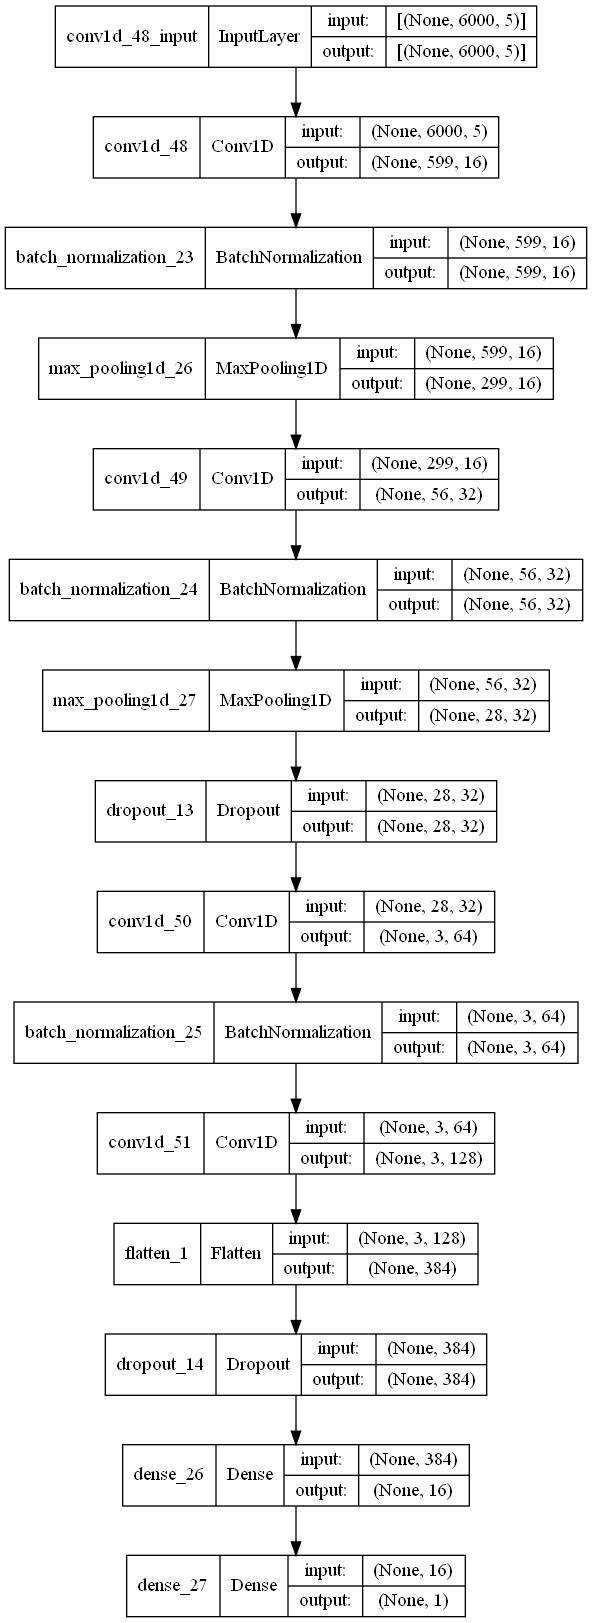

In [8]:
tf.keras.utils.plot_model(model, to_file="model.png", show_layer_names=True, show_shapes=True)